In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_point,labs, theme_minimal


In [3]:

path = os.getcwd()

df_classic_train = pd.read_csv(f'{path}/training_set.csv')

df_college_info_ken = pd.read_csv(f'{path}/college_info_ken.csv')

df_college_info = pd.read_csv(f'{path}/institutions.csv')



##---------------------------------------------------------------------------
#num_brackets_df_train[num_brackets_df_train['bracket_entry_count'] > 1]

# perc_Id_w_multiple_brackets = num_brackets_df[num_brackets_df['BracketEntryId'] > 1].shape[0] / num_brackets_df.shape[0]
# print(perc_Id_w_multiple_brackets)
# #We can see that the majority of customers have bracket entries of 1-4
# ax = sns.histplot(num_brackets_df_train['bracket_entry_count'], bins=15)
# ax.set_title('Histogram of Bracket Entry Count')
# plt.show()
##---------------------------------------------------------------------------


##---------------------------------------------------------------------------
# #76097 Customer Ids and It seems that 445 customers created multiple brackets
# #76097 - 75652 = 445


# '''Evaluation of Metrics'''
# # %pip install openpyxl
# corr = model_1_df.loc[:, ['team_win_diff_ms','team_win_diff_ew','closeness_ms', 'closeness_ew','SemifinalWinner_South_Midwest', 'SemifinalWinner_East_West']].corr()

# # corr.to_excel('~/Desktop/output.xlsx', index=False)

# plt.figure(figsize=(10,10))
# sns.heatmap(corr, annot=True)
# plt.show()




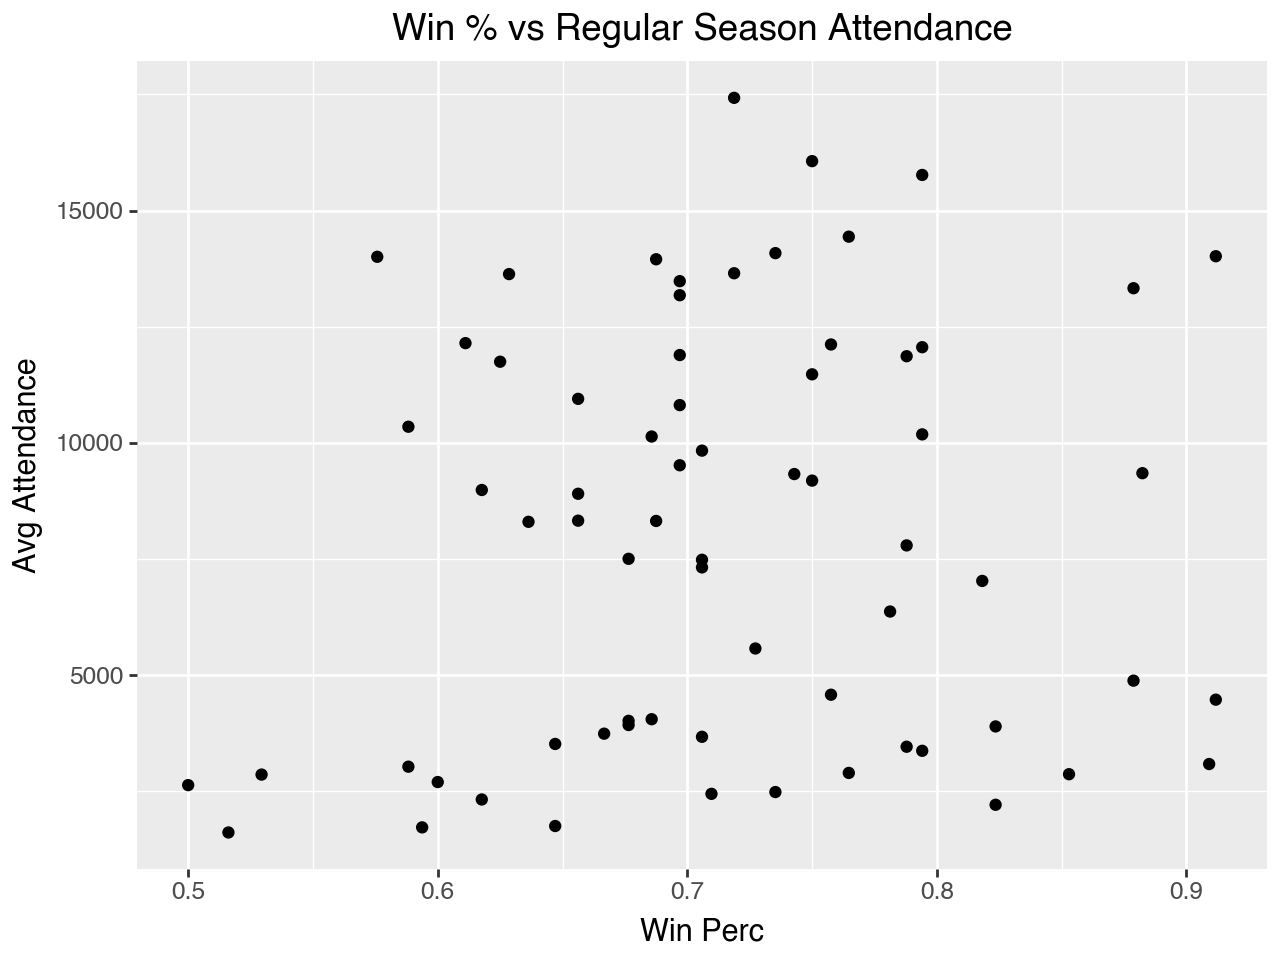

In [10]:
#EDA
# sns.scatterplot(x = df_college_info_ken['win_%'], y = df_college_info_ken['RegularSeasonAverageAttendance'])

plot = (
    ggplot(df_college_info_ken, aes(x='win_%', y='RegularSeasonAverageAttendance'))
    + geom_point()
    + labs(title="Win % vs Regular Season Attendance",
           x="Win Perc",
           y="Avg Attendance")
)

plot
#Change this to plotnine ggplot!

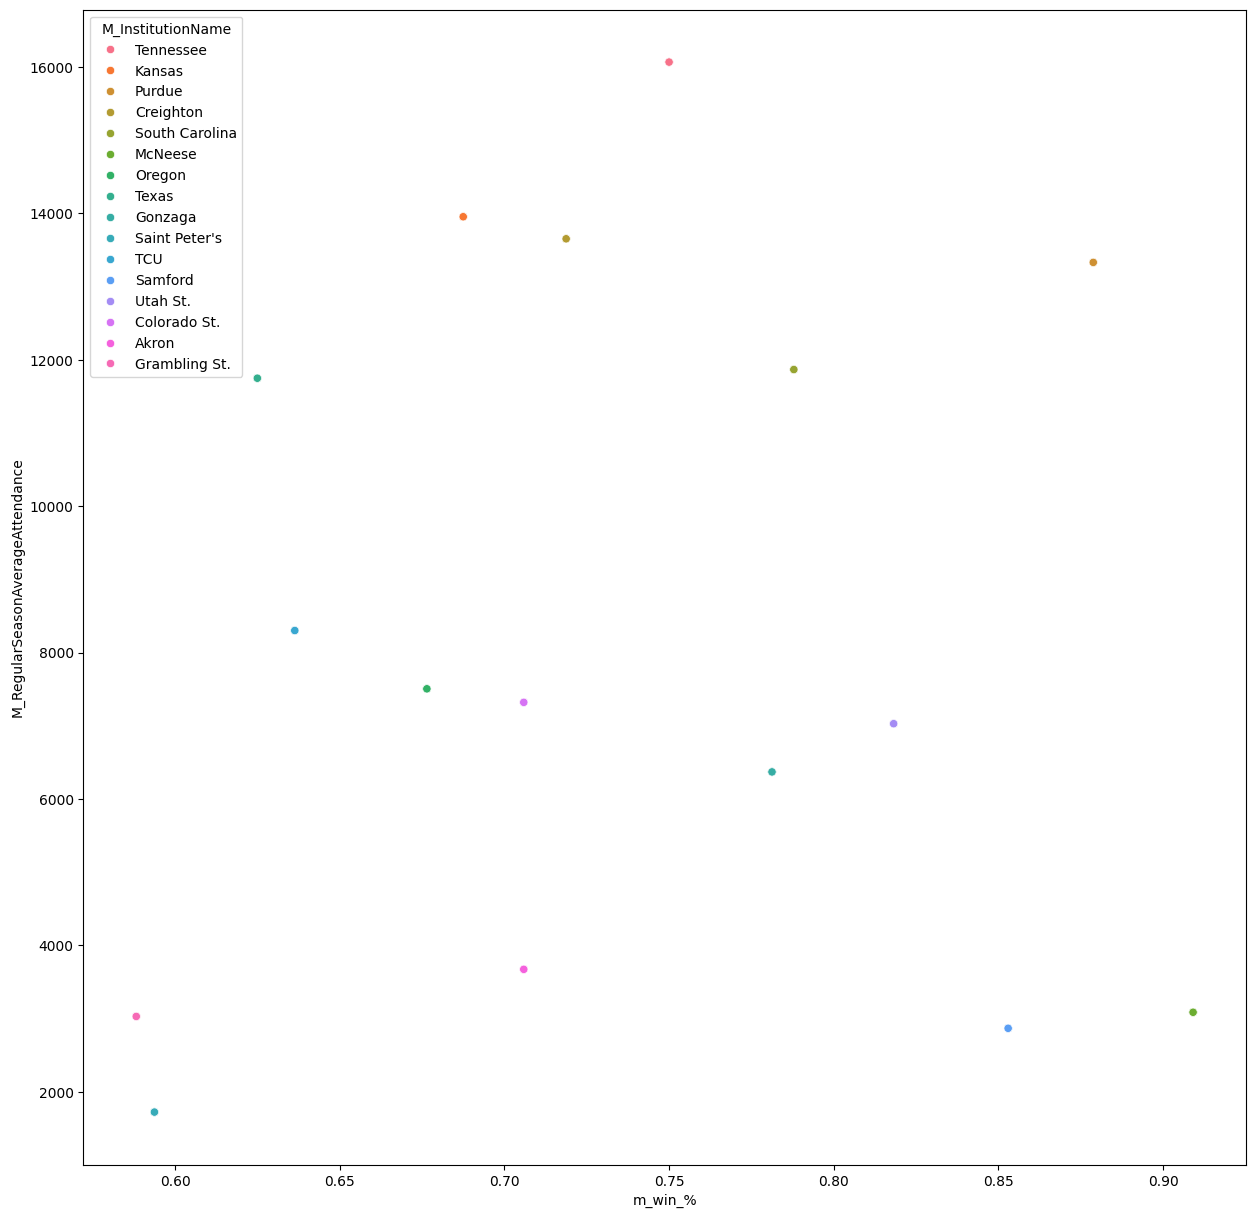

In [7]:

#Sample graph to show that Customers do not care about How much their team wins!
plt.figure(figsize=(15,15))
ax_attendance = sns.scatterplot(x = df_classic_train['m_win_%'], y = df_classic_train['M_RegularSeasonAverageAttendance'], hue=df_classic_train['M_InstitutionName'])
plt.show()

<h2>Semifinal South Midwest Champion Analysis<h2>

***Distribution of Semifinal Winner Choice (South & Midwest Champions)***
- **Why is it important?** *Analyzing the distribution of the Semifinal South & Midwest champions selected in fan-created brackets provides valuable insights into customer affinity and decision-making patterns. By understanding which teams are frequently chosen, we can identify potential biases, brand loyalty, and regional preferences that influence selection behavior. This information is crucial for feature engineering, as it helps us create predictive variables that capture fan sentiment, historical trends, and perceived team strength.*


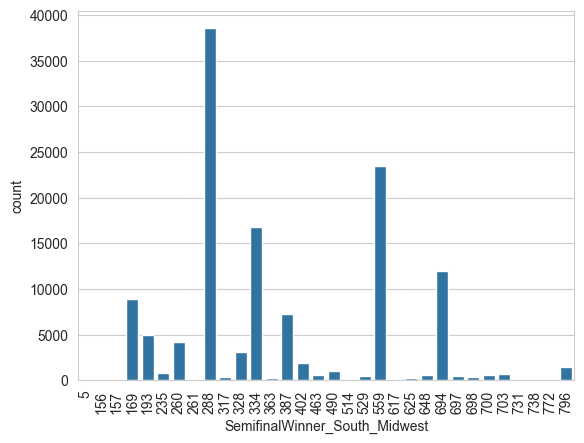

In [5]:
sns.set_style('whitegrid')
ax_1 = sns.countplot(x=df_classic_train['SemifinalWinner_South_Midwest'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# df_college_info[df_college_info['InstitutionID'] == 288]
# df_college_info[df_college_info["InstitutionID"] == 334]
# df_college_info[df_college_info["InstitutionID"] == 387]
# df_college_info[df_college_info["InstitutionID"] == 164]


,InstitutionID,InstitutionName,InstitutionNickname,InstitutionAbbreviation,InstitutionCity,InstitutionState,InstitutionPostalCode,InstitutionDMACode,InstitutionDMADescription,InstitutionLatitude,InstitutionLongitude,InstitutionConference,InstitutionEnrollment_Male,InstitutionEnrollment_Female,InstitutionEnrollment_Total,InstitutionNCAAMemberSinceDate,RegularSeasonWins,RegularSeasonLosses,RegularSeasonAverageAttendance,RegularSeasonAverageScore
24,164,UConn,Huskies,UCONN,Storrs,CT,06269,533,HARTFORD & NEW HAVEN,41.8091,-72.24995,Big East Conference,10645,11834,22479,09/01/1910,31,3,14017.88,81.47


<h3>Aggregated Analysis of South-Midwest Semifinalist Picks<h3>

## **Analyzing Regional Affinity in Fan Selections for the 2024 NCAA March Madness Tournament**

### **Understanding the 81% Concentration of Fan Selections**
The analysis of the **Semifinal Winner Selections (South-Midwest)** from fan-created brackets reveals that, on average, **81% of selections within each DMA** were concentrated among just the top five teams. This insight, derived from calculating the proportion of votes per DMA, provides **key takeaways about regional loyalty and fan behavior**.

---

### **Why Is This Important?**
#### **1. Strong Regional Dominance of the Top Teams**
- The fact that a small set of teams captures the vast majority of selections suggests **overwhelming regional favoritism**.
- This dominance can be attributed to **historical team success, geographic proximity, and media influence (popularity)**.
- In DMAs where one team dominates, it indicates **deep-rooted fan loyalty and consistent team support over time**.

#### **2. High Predictability of Regional Affinity**
- Since most DMAs show **concentrated voting patterns**, this suggests a **predictable trend in team selections**.
- **Local teams tend to receive overwhelming support** from their home DMAs, reinforcing the idea that fans prefer teams from their own region.
- In contrast, if a DMA disproportionately favors an **out-of-region team**, it signals potential influence from **national branding, media exposure, or cultural factors**.

#### **3. Feature Engineering for Predictive Modeling**
- This insight provides valuable opportunities for **quantifying regional bias in fan selections**, leading to powerful predictive features:
  - **Regional Affinity Score:** Measures the percentage of selections made for a team within its own DMA vs. selections from outside regions.
  - **Local vs. Non-Local Selection Ratio:** Helps determine if a region is **strongly biased toward a home team** or influenced by national favorites.
  - **Predictive Weighting of Team Popularity:** By incorporating **DMA-based fan preference scores**, we can improve models predicting future bracket choices.

#### **4. Business and Marketing Implications**
- The **regional concentration of fan picks** provides an opportunity for:
  - **Targeted advertising & promotions** focused on regions where certain teams have the strongest affinity.
  - **Enhanced sports coverage strategies**, where media outlets tailor content to highly engaged DMAs.
  - **Sponsorship alignment**, as brands can invest in regions where fan engagement is highest.

---



<h1>The Teams Below were the top chosen teams:<h1>
    - **Houston**
    - **Purdue**
    - **Marquette**
    - **Tennessee**
    - **Kentucky**
    - **Creighton**


In [4]:
top_picks = df_college_info[(df_college_info["InstitutionID"] == 559) |
             (df_college_info["InstitutionID"] == 334) |
             (df_college_info["InstitutionID"] == 387) |
             (df_college_info["InstitutionID"] == 694) |
             (df_college_info['InstitutionID'] == 169) |
             (df_college_info["InstitutionID"] == 288)].sort_values('RegularSeasonWins', ascending=False)
top_picks.loc[:, ['InstitutionID', 'InstitutionName', 'InstitutionDMACode','RegularSeasonWins','RegularSeasonLosses','RegularSeasonAverageAttendance' ]]

,InstitutionID,InstitutionName,InstitutionDMACode,RegularSeasonWins,RegularSeasonLosses,RegularSeasonAverageAttendance
14,288,Houston,618,30,4,9347.35
23,559,Purdue,582,29,4,13329.06
13,387,Marquette,617,25,9,14084.65
37,694,Tennessee,557,24,8,16065.47
9,334,Kentucky,541,23,9,17427.94
61,169,Creighton,652,23,9,13651.44


This displays the amount of votes given by DMA, this matters because it reveals DMA codes that are more interested in NCAA!

In [5]:
dma_count_groupby = df_classic_train.groupby(by='CustomerDMACode').agg(semi_midwest_south_count= pd.NamedAgg(column='SemifinalWinner_South_Midwest', aggfunc='count'),
                                              semi_east_west_count= pd.NamedAgg(column='SemifinalWinner_East_West', aggfunc='count'))
dma_count_groupby

,semi_midwest_south_count,semi_east_west_count
CustomerDMACode,,
500.0,256,256
501.0,5123,5123
502.0,108,108
503.0,63,63
504.0,2706,2706
...,...,...
862.0,716,716
866.0,153,153
868.0,74,74


This shows us the percentage that each most picked teams contributed to the overall percentage of total votes within each dma. This reveals that popular picks are dominant across dma's, with an average being 81%!

In [6]:
dma_distribution_south_midwest = df_classic_train.groupby(by =['CustomerDMACode', 'CustomerDMADescription'])['SemifinalWinner_South_Midwest'] \
                                             .value_counts() \
                                             .unstack(fill_value=0)
# dma_distribution_south_midwest.sort_values(559, ascending=False).head(20)

dma_distribution_south_midwest_prop = dma_distribution_south_midwest.div(dma_distribution_south_midwest.sum(axis=1), axis=0)

dma_distribution_south_midwest_prop.sort_values(772, ascending=False).head(10)
top_picks_by_dma = dma_distribution_south_midwest_prop.loc[:,[559, 334, 387, 694, 169, 288, 772]]
top_picks_by_dma['Sum'] = top_picks_by_dma[559] + top_picks_by_dma[334] + top_picks_by_dma[387] + top_picks_by_dma[694] + top_picks_by_dma[169] \
+ top_picks_by_dma[288]


top_picks_by_dma


,SemifinalWinner_South_Midwest,559,334,387,694,169,288,772,Sum
CustomerDMACode,CustomerDMADescription,,,,,,,,
500.0,PORTLAND - AUBURN,0.199219,0.164062,0.054688,0.085938,0.078125,0.246094,0.000000,0.828125
501.0,NEW YORK,0.162795,0.139371,0.059340,0.093305,0.083935,0.270935,0.000976,0.809682
502.0,BINGHAMTON,0.203704,0.185185,0.046296,0.120370,0.046296,0.166667,0.000000,0.768519
503.0,MACON,0.253968,0.142857,0.031746,0.095238,0.079365,0.158730,0.000000,0.761905
504.0,PHILADELPHIA,0.179601,0.131190,0.061345,0.101626,0.083518,0.268662,0.000000,0.825942
...,...,...,...,...,...,...,...,...,...
862.0,SACRAMNTO - STKTN - MODESTO,0.199721,0.113128,0.050279,0.082402,0.057263,0.293296,0.000000,0.796089
866.0,FRESNO - VISALIA,0.267974,0.111111,0.045752,0.058824,0.052288,0.287582,0.000000,0.823529
868.0,CHICO - REDDING,0.175676,0.229730,0.040541,0.027027,0.175676,0.189189,0.000000,0.837838


In [20]:
print(top_picks_by_dma.Sum.mean())

0.8124172897661928


In [14]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Simulated Data: Proportion of Top 5 Teams Picked Across Different DMAs
# dma_codes = ["Portland", "New York", "Binghamton", "Macon", "Philadelphia", "Sacramento", "Fresno", "Chico", "Spokane"]
# team_559 = [0.199, 0.163, 0.204, 0.254, 0.180, 0.200, 0.268, 0.176, 0.196]
# team_334 = [0.164, 0.139, 0.185, 0.143, 0.131, 0.113, 0.111, 0.230, 0.088]
# team_387 = [0.055, 0.059, 0.046, 0.032, 0.061, 0.050, 0.046, 0.041, 0.072]
# team_694 = [0.086, 0.093, 0.120, 0.095, 0.102, 0.082, 0.059, 0.027, 0.081]
# team_169 = [0.078, 0.084, 0.046, 0.079, 0.084, 0.057, 0.052, 0.176, 0.058]
# team_288 = [0.246, 0.271, 0.167, 0.159, 0.269, 0.293, 0.288, 0.189, 0.251]

# # Create DataFrame
# df_dma_teams = pd.DataFrame({
#     "DMA": dma_codes,
#     "Team 559": team_559,
#     "Team 334": team_334,
#     "Team 387": team_387,
#     "Team 694": team_694,
#     "Team 169": team_169,
#     "Team 288": team_288
# })

# # Melt DataFrame for Seaborn
# df_melted = df_dma_teams.melt(id_vars=["DMA"], var_name="Team", value_name="Proportion")

# # Plot
# plt.figure(figsize=(12, 6))
# sns.barplot(data=df_melted, x="DMA", y="Proportion", hue="Team")
# plt.xticks(rotation=45, ha='right')
# plt.xlabel("DMA Region")
# plt.ylabel("Proportion of Selections")
# plt.title("Proportion of Top 5 Teams Picked Across Sample DMAs")
# plt.legend(title="Teams")
# plt.grid(axis="y", linestyle="--", alpha=0.7)

# # Show plot
# plt.show()

import matplotlib.pyplot as plt

# Use a minimal style
# plt.style.use('seaborn-white')

# Select top 7 DMAs by "Sum" if available; otherwise, select the first 7 rows
if 'Sum' in top_picks_by_dma.columns:
    df_plot = top_picks_by_dma.sort_values('Sum', ascending=False).head(7).drop(columns=['Sum'])
else:
    df_plot = top_picks_by_dma.head(7)

df_plot.to_csv('for_excel_data.csv')
# # Create a large figure suitable for a poster
# fig, ax = plt.subplots(figsize=(16, 10))

# # Plot the stacked bar chart with a pleasing colormap
# df_plot.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# # Customize the appearance for clarity and minimalism
# ax.set_title('Proportion of Top (S-M) Semifinalist  Picks by DMA', fontsize=24, weight='bold')
# ax.set_xlabel('DMA (Customer DMACode)', fontsize=18)
# ax.set_ylabel('Proportion', fontsize=18)

# # Remove gridlines for a cleaner look
# # ax.grid(False)
# # ax.set_facecolor('white')

# # Optionally remove the frame spines for an even more minimal aesthetic
# # for spine in ax.spines.values():
# #     spine.set_visible(False)

# # # Adjust tick parameters for better readability
# # ax.tick_params(axis='both', which='major', labelsize=14)

# # # Place a clear legend outside the plot area
# ax.legend(title='Team Code', fontsize=14, title_fontsize=16, loc='upper right', bbox_to_anchor=(1.15, 1))

# plt.tight_layout()
# plt.show()


<h3>Aggregated Analysis of East-West Semifinalist Picks<h3>

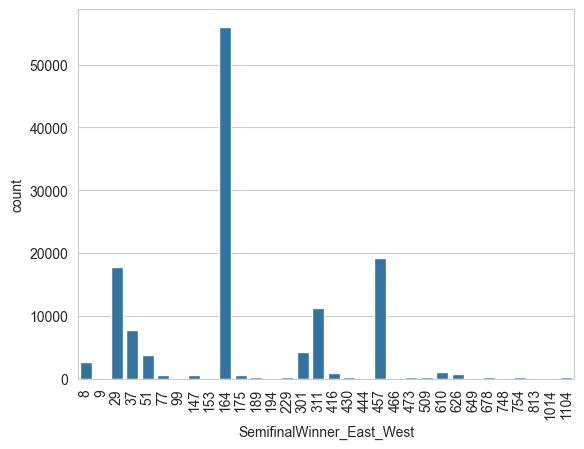

In [21]:
ax_1 = ax_1 = sns.countplot(x=df_classic_train['SemifinalWinner_East_West'])
plt.xticks(rotation=90)
plt.show()

In [22]:
dma_distribution_east_west = df_classic_train.groupby(by =['CustomerDMACode', 'CustomerDMADescription'])['SemifinalWinner_East_West'] \
                                             .value_counts() \
                                             .unstack(fill_value=0)

dma_distribution_east_west_prop = dma_distribution_east_west.div(dma_distribution_east_west.sum(axis=1), axis=0)


dma_ew = dma_distribution_east_west_prop.loc[:, [29,311,457,164]]
dma_ew['sum'] = dma_ew[29] + dma_ew[311] + dma_ew[457] + dma_ew[164]

dma_ew

,SemifinalWinner_East_West,29,311,457,164,sum
CustomerDMACode,CustomerDMADescription,,,,,
500.0,PORTLAND - AUBURN,0.113281,0.078125,0.167969,0.500000,0.859375
501.0,NEW YORK,0.118680,0.068124,0.148351,0.484287,0.819442
502.0,BINGHAMTON,0.212963,0.055556,0.138889,0.388889,0.796296
503.0,MACON,0.063492,0.047619,0.222222,0.412698,0.746032
504.0,PHILADELPHIA,0.133038,0.072062,0.168884,0.422395,0.796378
...,...,...,...,...,...,...
862.0,SACRAMNTO - STKTN - MODESTO,0.146648,0.076816,0.148045,0.427374,0.798883
866.0,FRESNO - VISALIA,0.143791,0.111111,0.163399,0.431373,0.849673
868.0,CHICO - REDDING,0.162162,0.081081,0.243243,0.324324,0.810811


In [24]:
dma_ew['sum'].mean()

0.7966587460578112

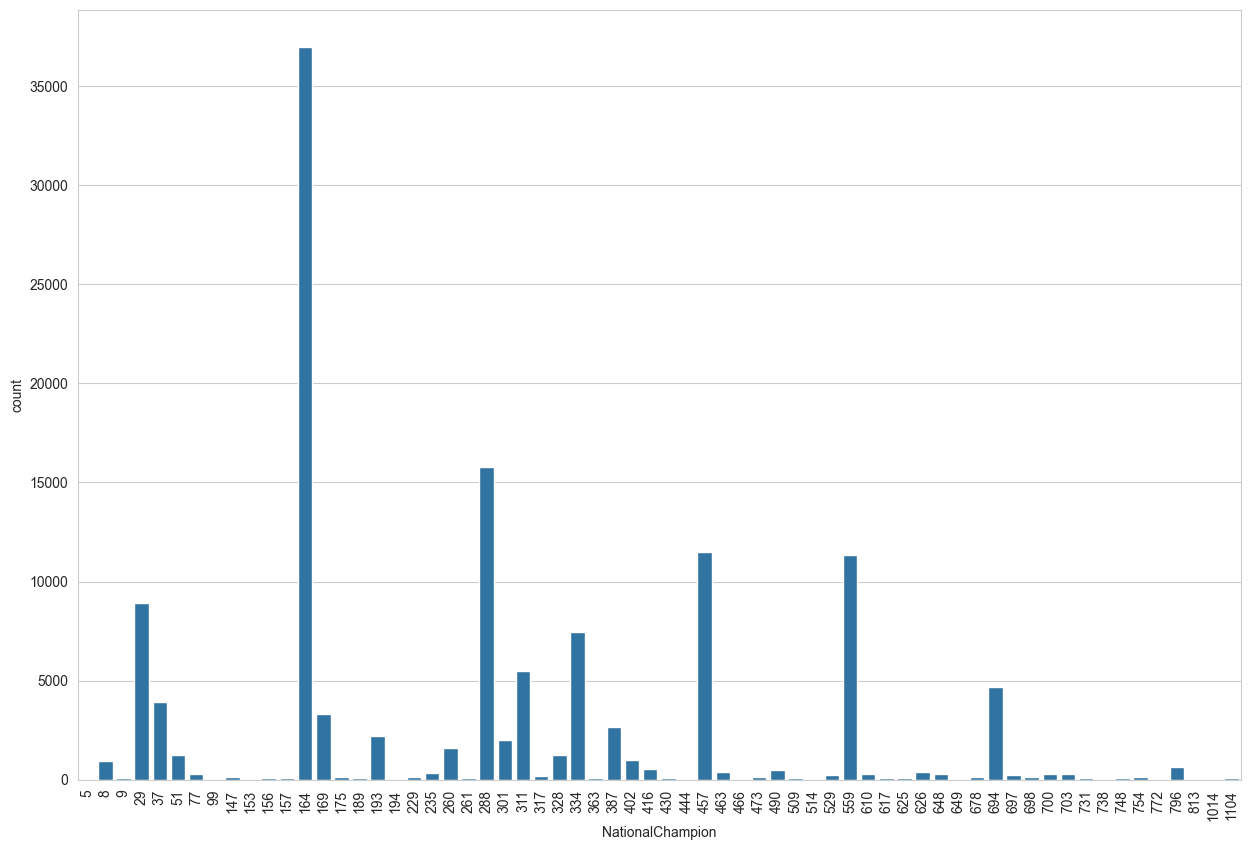

In [25]:
plt.figure(figsize=(15,10))
ax_1 = ax_1 = sns.countplot(x=df_classic_train['NationalChampion'])
plt.xticks(rotation=90)
plt.show()

In [32]:
dma_distribution_nat = df_classic_train.groupby(by =['CustomerDMACode', 'CustomerDMADescription'])['NationalChampion'] \
                                             .value_counts() \
                                             .unstack(fill_value=0)

dma_distribution_nat_prop = dma_distribution_nat.div(dma_distribution_nat.sum(axis=1), axis=0)


dma_nat = dma_distribution_nat_prop.loc[:, [29, 311, 457,164, 559, 334, 387, 694, 169, 288, 772]]

dma_nat

dma_nat['sum'] = dma_nat[29] + dma_nat[311] + dma_nat[457] + dma_nat[164] + dma_nat[559] + \
     dma_nat[334] + dma_nat[387] + dma_nat[694] + dma_nat[169] + dma_nat[288] + dma_nat[772]

dma_nat


,NationalChampion,29,311,457,164,559,334,387,694,169,288,772,sum
CustomerDMACode,CustomerDMADescription,,,,,,,,,,,,
500.0,PORTLAND - AUBURN,0.058594,0.039062,0.101562,0.343750,0.062500,0.066406,0.019531,0.039062,0.035156,0.089844,0.000000,0.855469
501.0,NEW YORK,0.056022,0.033964,0.092719,0.348819,0.065001,0.053875,0.019910,0.033574,0.027913,0.106773,0.000195,0.838766
502.0,BINGHAMTON,0.092593,0.046296,0.120370,0.250000,0.092593,0.046296,0.018519,0.027778,0.009259,0.074074,0.000000,0.777778
503.0,MACON,0.031746,0.015873,0.158730,0.253968,0.095238,0.063492,0.000000,0.063492,0.031746,0.063492,0.000000,0.777778
504.0,PHILADELPHIA,0.066888,0.037694,0.097561,0.280857,0.083518,0.053215,0.024390,0.042868,0.031781,0.120103,0.000000,0.838877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862.0,SACRAMNTO - STKTN - MODESTO,0.081006,0.029330,0.078212,0.289106,0.093575,0.041899,0.023743,0.046089,0.026536,0.120112,0.000000,0.829609
866.0,FRESNO - VISALIA,0.071895,0.058824,0.071895,0.281046,0.130719,0.045752,0.019608,0.039216,0.013072,0.124183,0.000000,0.856209
868.0,CHICO - REDDING,0.081081,0.000000,0.162162,0.243243,0.081081,0.108108,0.040541,0.000000,0.040541,0.081081,0.000000,0.837838


In [33]:
dma_nat['sum'].mean()

0.819992596809737